In [284]:
# importing the basic libraries required in the assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. (5 marks) Perform gradient descent with backtracking line search method to solve the following optimization problem as mentioned in detail in the subpoints:<br>


(a) Create functions:<br>
i. objective(X): For computing the value of f<br>
ii. grad objective(X): For computing the gradient of f w.r.t. x

In [285]:
# creating the objective for the function
def objective(x1,x2,d):
    value= -(x2+47)*(np.sin(np.sqrt(abs(x2+(x1/2)+47))))-x1*(np.sin(np.sqrt(abs(x1-(x2+47)))))
    return value

In [286]:
# creating the gradient for the objective function
def grad_objective(x1,x2):
    temp1=2*x2+x1+94
    temp2=x1-x2-47
    # the value1 and value2 are the derivatives with respect to x1 and x2 respectively
    value1= -(np.cos(np.sqrt(abs(x2+(x1/2)+47)))*(temp1)*(x2+47)/(2*np.sqrt(2)*abs(temp1)*np.sqrt(abs(temp1))))-np.sin(np.sqrt(abs(temp2)))-(x1*np.cos(np.sqrt(abs(temp2)))*temp2/(2*temp2*np.sqrt(abs(temp2))))
    value2= -(np.cos(np.sqrt(abs(x2+(x1/2)+47)))*(temp1)*(x2+47)/(np.sqrt(2)*abs(temp1)*np.sqrt(abs(temp1))))-np.sin(np.sqrt(abs(x2+(x1/2)+47)))+(x1*np.cos(np.sqrt(abs(temp2)))*temp2/(2*temp2*np.sqrt(abs(temp2))))
    
    # returning an array for gradient values
    return [value1,value2]

(b) Plot this objective function on a 3D plot. Your plot must help in visualizing the function clearly. Use appropriate number of points (n) for a smooth plot.

In [287]:
# Plotting the objective function
def plot_objective(f, n, d, lb, ub, seed_value):
    np.random.seed(seed_value)
    n_points = n
    
    # randomly generating points within the lower and upper bound
    X = np.random.uniform(lb, ub, size=(n_points, d))
    
    # putting the values in the function for plotting the 3-D plot
    y = np.array([f(x1,x2, d) for x1,x2 in X])

    # Make a 3D plot
    if d > 2:
        print('Not possible to plot more than 3 dimensions.')
        return X, y
    
    # defining the size of the figure
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes(projection='3d')
    # plotting the plot along 3 axis
    ax.plot_trisurf(X[:,0], X[:,1], y, cmap='viridis', linewidth=0, antialiased=False)
    
    # setting the labels for the plot
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$f(\mathbb{x})$')
    
    # showing the plot
    plt.show()
    plt.close()
    return X, y

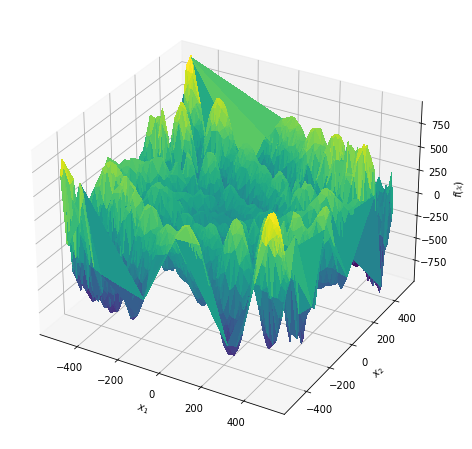

In [288]:
# defining the dimensions for the function
d = 2

# calling the plotting function to plot the 3 D figure
X, y = plot_objective(objective, n=5000, d=d, lb=-512, ub=512, seed_value=100)

(c) Plot the contour plot for f.

In [289]:
# defining the contour plot function
def plot_contour(X, y, d):
    if d > 2:
        print('Not possible to plot contour for more than 3 dimensions.')
        return
    
    # defining the figure size
    fig = plt.figure(figsize=(12,8))
    
    # plotting the contour
    plt.tricontour(X[:,0], X[:,1], y, 50, cmap='viridis')
    plt.scatter(X[:,0], X[:,1], s=2, alpha=0.5)
    
    # setting up the labels for contour
    plt.title('Contour Plot') 
    plt.xlabel('feature_x') 
    plt.ylabel('feature_y') 
    
    # showing the plot
    plt.show()
    plt.close()

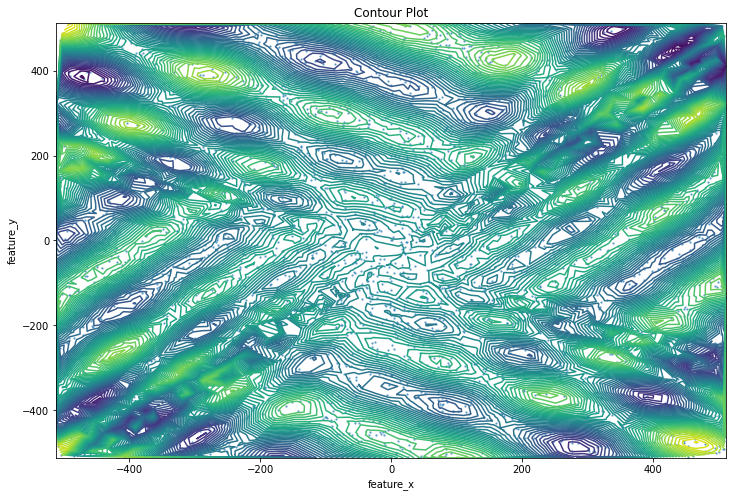

In [290]:
# calling the contour plot function to plot the contour
plot_contour(X, y, d)

(d) Implement the gradient descent with backtracking line search algorithm from scratch and output the value
of f and x at global minimum. Choose initial x wisely by taking help from contour plot.

In [291]:
# creating global variables for threshold, learning rate and beta to output the final values after gradient descent completed
final_threshold=0
final_learning_rate=0
final_beta=0

# defining the gradient descent function
def gradient_descent(d, obj_func, grad_func, x_init, max_iter, threshold):
    
    # accessing the global values
    global final_threshold, final_learning_rate, final_beta
    
    # changing the integer values to float values
    x = np.array([float(x_i) for x_i in x_init])
    
    # storing the current x values in the history of x
    x_history = x
    
    # finding the value of objective function using x values
    f_history = obj_func(x[0],x[1], d)
    
    # creating a matrix of shape of x
    delta_x = np.zeros(x.shape)
    diff = 1.0e10
    i = 0
    
    # loop until we don't reach max iterations or not lower than threshold
    while i < max_iter and diff>threshold:
        print('Iteration {}\n--------------------------'.format(i+1))
        grad=grad_func(x[0],x[1])
        # initializing value for beta and learning rate
        beta=0.9
        learning_rate=1
        
        while obj_func((x[0] - learning_rate* grad[0]),(x[1] - learning_rate* grad[1]), d) > obj_func(x[0],x[1], d) - 0.001:
            # updating the learning
            learning_rate*= beta
            if learning_rate < 0.0001:
                learning_rate = 0
                break
        delta_x = [-learning_rate*g for g in grad_func(x[0],x[1])]
        print('delta: ', delta_x)
        x += delta_x
        print('x_new: ', x)
        # store the history of x and f
        x_history = np.vstack((x_history, x))
        f_history = np.vstack((f_history, obj_func(x[0],x[1], d)))
        diff = np.absolute(f_history[-1]-f_history[-2])
        i+=1
        print('\n')
    
    # storing the final values in global variables
    final_threshold=threshold
    final_learning_rate=learning_rate
    final_beta=beta
        
    
    return x_history,f_history

In [309]:
x_initial = np.array([-450,-390])
max_iter = 100
threshold = 1.0e-4
print('Initial value of x: ', x_initial)

# calling the gradient descent function and storinf x and f values
x_history, f_history = gradient_descent(d, objective, grad_objective, x_initial, max_iter, threshold)
print('Final value of x: ', x_history[-1])
print('Optimum value of f: ', f_history[-1])

Initial value of x:  [-450 -390]
Iteration 1
--------------------------
delta:  [-0.0, 0.0]
x_new:  [-450. -390.]


Final value of x:  [-450. -390.]
Optimum value of f:  [-688.33008249]


(e) Report the best values of threshold, learning rate and beta for previous question.

In [293]:
# printing the best values useing the global variables
print(final_threshold)
print(final_learning_rate)
print(final_beta)

0.0001
0
0.9


(f) For each of the following initial x values, report the final x values after performing gradient descent with
backtracking line search on f:

i. [−100; 100]

In [294]:
x_initial = np.array([-100,100])
print('Initial value of x: ', x_initial)
x_history, f_history = gradient_descent(d, objective, grad_objective, x_initial, max_iter, threshold)
print('Final value of x: ', x_history[-1])

Initial value of x:  [-100  100]
Iteration 1
--------------------------
delta:  [-0.22781686427445358, -10.394520505341752]
x_new:  [-100.22781686   89.60547949]


Iteration 2
--------------------------
delta:  [-0.23789135955527518, -10.255462382744065]
x_new:  [-100.46570822   79.35001711]


Iteration 3
--------------------------
delta:  [0.4949043554115935, -7.552840963622984]
x_new:  [-99.97080387  71.79717615]


Iteration 4
--------------------------
delta:  [-0.0, 0.0]
x_new:  [-99.97080387  71.79717615]


Final value of x:  [-99.97080387  71.79717615]


ii. [10.52, 10.52]

In [295]:
x_initial = np.array([-10.52,10.52])
print('Initial value of x: ', x_initial)
x_history, f_history = gradient_descent(d, objective, grad_objective, x_initial, max_iter, threshold)
print('Final value of x: ', x_history[-1])

Initial value of x:  [-10.52  10.52]
Iteration 1
--------------------------
delta:  [2.331971530493879, 2.8931762711616487]
x_new:  [-8.18802847 13.41317627]


Iteration 2
--------------------------
delta:  [1.8038823656727763, 2.1119741966510786]
x_new:  [-6.3841461  15.52515047]


Iteration 3
--------------------------
delta:  [1.3735838467427783, 1.4335757662968978]
x_new:  [-5.01056226 16.95872623]


Iteration 4
--------------------------
delta:  [1.0616306733093734, 0.9286576494896315]
x_new:  [-3.94893158 17.88738388]


Iteration 5
--------------------------
delta:  [0.8466035674142195, 0.5771661049661662]
x_new:  [-3.10232802 18.46454999]


Iteration 6
--------------------------
delta:  [0.7010178918657458, 0.33885430310031184]
x_new:  [-2.40131012 18.80340429]


Iteration 7
--------------------------
delta:  [0.6028033784138411, 0.17860256679838865]
x_new:  [-1.79850675 18.98200686]


Iteration 8
--------------------------
delta:  [0.5364211941200749, 0.07080921966111131]
x_new

iii. [200; 500]

In [296]:
x_initial = np.array([200,500])
print('Initial value of x: ', x_initial)
x_history, f_history = gradient_descent(d, objective, grad_objective, x_initial, max_iter, threshold)
print('Final value of x: ', x_history[-1])

Initial value of x:  [200 500]
Iteration 1
--------------------------
delta:  [10.147737197573, 5.322950337343879]
x_new:  [210.1477372  505.32295034]


Iteration 2
--------------------------
delta:  [9.696384542870351, 4.568602750665023]
x_new:  [219.84412174 509.89155309]


Iteration 3
--------------------------
delta:  [8.967844318750426, 3.671994508445933]
x_new:  [228.81196606 513.5635476 ]


Iteration 4
--------------------------
delta:  [8.031768132242213, 2.83552447262211]
x_new:  [236.84373419 516.39907207]


Iteration 5
--------------------------
delta:  [6.971625921569883, 2.1838468334610877]
x_new:  [243.81536011 518.5829189 ]


Iteration 6
--------------------------
delta:  [5.878475788423481, 1.7371363779670874]
x_new:  [249.6938359  520.32005528]


Iteration 7
--------------------------
delta:  [4.837331721124826, 1.4453800473373009]
x_new:  [254.53116762 521.76543533]


Iteration 8
--------------------------
delta:  [1.8696632671055011, 0.5941237914136813]
x_new:  [256.

iv. [−512; 512]

In [297]:
x_initial = np.array([-512,512])
print('Initial value of x: ', x_initial)
x_history, f_history = gradient_descent(d, objective, grad_objective, x_initial, max_iter, threshold)
print('Final value of x: ', x_history[-1])

Initial value of x:  [-512  512]
Iteration 1
--------------------------
delta:  [0.0, -0.0]
x_new:  [-512.  512.]


Final value of x:  [-512.  512.]


2. (BONUS 1 mark) For the dataset patients.csv, column ‘A44’ is the target and other columns are features. You need to predict the target using LASSO CV. You are free to use required libraries. You have to predict the target value for the test data given in the file test.csv. You need to create a new column "A44" in test.csv which will contain the target value for each row. Also print the optimal alpha value in your code. Submit the updated test.csv file along with the .ipynb notebook.

In [298]:
# reading the csv data to dataframe
df=pd.read_csv('patients.csv')
print('---- Train data is imported successfully ----')
df.head()

---- Train data is imported successfully ----


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44
0,60,59,67,58,66,60,72,79,74,75,...,67,66,71,76,70,69,67,59,60,55
1,65,63,73,75,67,61,76,65,62,62,...,50,46,66,67,49,43,43,43,41,43
2,67,70,63,48,63,60,76,75,65,52,...,68,65,76,62,72,61,68,61,54,53
3,65,69,70,71,56,63,63,70,44,51,...,71,73,68,64,62,59,59,64,53,55
4,59,55,51,65,68,45,21,25,45,41,...,18,24,44,59,36,47,29,28,52,13


In [299]:
# checking the data shape
df.shape

(257, 44)

In [300]:
# storing all the indexes
columns=df.columns

# storing all features in X and target in y
X=df[columns[:43]]
y=df[columns[-1]]

In [301]:
# importing the train_test_split to split the data into train and test data
from sklearn.model_selection import train_test_split

# splitting the data for training and testing in 80 to 20 ratio
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [302]:
# defining alpha value array
alpha_lasso = [1e-10, 1e-9, 1e-8,1e-7,1e-6, 1e-5,1e-4, 1e-3,1e-2,1e-1, 1,2,3,4,5,6,7,8,9, 10]

In [303]:
# importing LassoCV regression model
from sklearn.linear_model import LassoCV

# training the model with cv=5 and alphas defined above
lasso_cv=LassoCV(alphas=alpha_lasso,cv=5,fit_intercept=True).fit(X_train,y_train)
print('---- Model is Trained ----')

---- Model is Trained ----


In [304]:
test=pd.read_csv('test.csv')
print('---- Test data is imported Successfully ----')
test.head()

---- Test data is imported Successfully ----


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43
0,65,67,67,61,55,57,66,74,64,69,...,55,63,64,60,61,74,63,59,58,50
1,67,59,54,48,63,67,77,78,71,61,...,43,76,77,80,69,61,48,63,61,37
2,79,77,78,70,69,65,75,75,69,66,...,51,72,75,72,73,68,63,41,36,25
3,55,66,58,75,71,77,68,73,63,69,...,79,70,74,62,71,67,66,63,61,53
4,72,63,68,62,72,63,79,61,57,49,...,72,53,46,63,62,53,43,38,35,32


In [305]:
y_predicted=lasso_cv.predict(test)
print('---- Values for column A44 are predicted ----')

---- Values for column A44 are predicted ----


In [306]:
test['A44']=y_predicted
print('---- column A44 is added ----')

---- column A44 is added ----


In [307]:
test.to_csv('predicted.csv',index=False)
print('---- A file with predicted value is generated with name predicted.csv ----')

---- A file with predicted value is generated with name predicted.csv ----


In [308]:
print('The Optimal value of Alpha is ', lasso_cv.alpha_)

The Optimal value of Alpha is  3.0
